In [1]:
# Dependencies and Setup
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st 

In [2]:
#finding our data path files
MM_data_path="data/Mouse_metadata.csv"
S_Results_path="data/Study_results.csv"

In [3]:
#Read the mouse data and the study results
MM_data_df=pd.read_csv(MM_data_path)
MM_data_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:

len(MM_data_df["Mouse ID"].unique())

249

In [5]:
#Read the mouse data and the study results
S_Results_df=pd.read_csv(S_Results_path)
S_Results_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
S_Results_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [7]:
#Combine the data into single dataset
Combine_data=pd.merge(MM_data_df,S_Results_df, on="Mouse ID", how="outer")
Combine_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
#Checking the number of mice.
#information can be obtain by checking number of rows of group values on Mouse ID
N_of_mice=len(Combine_data["Mouse ID"].unique())
N_of_mice

249

In [9]:
#Summary Statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Get Data of Mice and Drug Regime to obtain the maen, median, Std and SEM
Drug_Regime_Data=Combine_data[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
Drug_Regime_Count=Drug_Regime_Data.groupby(["Mouse ID","Drug Regimen"]).count()
Drug_Regime_Count


,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,10
a251,Infubinol,10
a262,Placebo,10
a275,Ceftamin,10
a366,Stelasyn,7
...,...,...
z435,Propriva,3
z578,Ramicane,10
z581,Infubinol,10


In [10]:
# Generate a summary statistics table of mean
Drug_Regime_mean_df=Drug_Regime_Data.groupby(["Mouse ID","Drug Regimen"]).mean()
Drug_Regime_mean_df.head(10)

,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,56.312708
a251,Infubinol,55.237095
a262,Placebo,58.611631
a275,Ceftamin,52.770965
a366,Stelasyn,54.639906
a401,Zoniferol,54.000706
a411,Ramicane,40.701385
a444,Ramicane,43.060052
a457,Ketapril,47.415437


In [11]:
# Generate a summary statistics table of median
Drug_Regime_median_df=Drug_Regime_Data.groupby(["Mouse ID","Drug Regimen"]).median()
Drug_Regime_median_df.head(10)

,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,55.983272
a251,Infubinol,55.938620
a262,Placebo,58.572588
a275,Ceftamin,52.044750
a366,Stelasyn,55.265582
a401,Zoniferol,53.207173
a411,Ramicane,39.988027
a444,Ramicane,42.893779
a457,Ketapril,47.462891


In [12]:
# Generate a summary statistics table of variance
Drug_Regime_Var_df=Drug_Regime_Data.groupby(["Mouse ID","Drug Regimen"]).var()
Drug_Regime_Var_df.head(10)

,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,50.407041
a251,Infubinol,51.740730
a262,Placebo,84.759928
a275,Ceftamin,36.322924
a366,Stelasyn,38.415384
a401,Zoniferol,52.261723
a411,Ramicane,6.836425
a444,Ramicane,1.256549
a457,Ketapril,5.721963


In [13]:
# Generate a summary statistics table of Standard Deviation
Drug_Regime_Std_df=Drug_Regime_Data.groupby(["Mouse ID","Drug Regimen"]).std()
Drug_Regime_Std_df

,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,7.099792
a251,Infubinol,7.193103
a262,Placebo,9.206515
a275,Ceftamin,6.026850
a366,Stelasyn,6.198015
...,...,...
z435,Propriva,1.861424
z578,Ramicane,4.239060
z581,Infubinol,5.461421


In [14]:
# Generate a summary statistics table of the SEM
Drug_Regime_SEM_df=Drug_Regime_Data.groupby(["Mouse ID","Drug Regimen"]).sem()
Drug_Regime_SEM_df

,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,2.245151
a251,Infubinol,2.274659
a262,Placebo,2.911356
a275,Ceftamin,1.905857
a366,Stelasyn,2.342629
...,...,...
z435,Propriva,1.074693
z578,Ramicane,1.340508
z581,Infubinol,1.727053


In [15]:
Drug_Regime_one=pd.merge(Drug_Regime_Count,Drug_Regime_mean_df, on="Mouse ID", how="outer")
Drug_Regime_one

,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
Mouse ID,,
a203,10,56.312708
a251,10,55.237095
a262,10,58.611631
a275,10,52.770965
a366,7,54.639906
...,...,...
z435,3,46.942214
z578,10,38.411510
z581,10,53.979584


In [16]:
Drug_Regime_Two=pd.merge(Drug_Regime_median_df,Drug_Regime_Var_df, on="Mouse ID", how="outer")
Drug_Regime_Two

,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
Mouse ID,,
a203,55.983272,50.407041
a251,55.938620,51.740730
a262,58.572588,84.759928
a275,52.044750,36.322924
a366,55.265582,38.415384
...,...,...
z435,47.115980,3.464898
z578,38.160380,17.969628
z581,53.062175,29.827123


In [17]:
Drug_Regime_Three=pd.merge(Drug_Regime_Std_df,Drug_Regime_SEM_df, on="Mouse ID", how="outer")
Drug_Regime_Three

,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
Mouse ID,,
a203,7.099792,2.245151
a251,7.193103,2.274659
a262,9.206515,2.911356
a275,6.026850,1.905857
a366,6.198015,2.342629
...,...,...
z435,1.861424,1.074693
z578,4.239060,1.340508
z581,5.461421,1.727053


In [18]:
Drug_Regime_Four=pd.merge(Drug_Regime_one,Drug_Regime_Two, on="Mouse ID", how="outer")

In [19]:
Drug_Regime_Summary=pd.merge(Drug_Regime_Four,Drug_Regime_Three, on="Mouse ID", how="outer")
Drug_Regime_Summary

,Tumor Volume (mm3)_x_x,Tumor Volume (mm3)_y_x,Tumor Volume (mm3)_x_y,Tumor Volume (mm3)_y_y,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
Mouse ID,,,,,,
a203,10,56.312708,55.983272,50.407041,7.099792,2.245151
a251,10,55.237095,55.938620,51.740730,7.193103,2.274659
a262,10,58.611631,58.572588,84.759928,9.206515,2.911356
a275,10,52.770965,52.044750,36.322924,6.026850,1.905857
a366,7,54.639906,55.265582,38.415384,6.198015,2.342629
...,...,...,...,...,...,...
z435,3,46.942214,47.115980,3.464898,1.861424,1.074693
z578,10,38.411510,38.160380,17.969628,4.239060,1.340508
z581,10,53.979584,53.062175,29.827123,5.461421,1.727053


In [20]:
Drug_Regime_Summ=Drug_Regime_Summary.rename(columns={"Tumor Volume (mm3)_x_x":"Counts",
                                                       "Tumor Volume (mm3)_y_x":"mean",
                                                       "Tumor Volume (mm3)_x_y":"Median",
                                                       "Tumor Volume (mm3)_y_y":"Variance",
                                                       "Tumor Volume (mm3)_x":"Standard Deviation",
                                                       "Tumor Volume (mm3)_y":"SEM"})

In [21]:
Drug_Regime_Summ

,Counts,mean,Median,Variance,Standard Deviation,SEM
Mouse ID,,,,,,
a203,10,56.312708,55.983272,50.407041,7.099792,2.245151
a251,10,55.237095,55.938620,51.740730,7.193103,2.274659
a262,10,58.611631,58.572588,84.759928,9.206515,2.911356
a275,10,52.770965,52.044750,36.322924,6.026850,1.905857
a366,7,54.639906,55.265582,38.415384,6.198015,2.342629
...,...,...,...,...,...,...
z435,3,46.942214,47.115980,3.464898,1.861424,1.074693
z578,10,38.411510,38.160380,17.969628,4.239060,1.340508
z581,10,53.979584,53.062175,29.827123,5.461421,1.727053


In [22]:
MM_New_Data=MM_data_df[["Mouse ID","Drug Regimen"]]
MM_New_Data

,Mouse ID,Drug Regimen
0,k403,Ramicane
1,s185,Capomulin
2,x401,Capomulin
3,m601,Capomulin
4,g791,Ramicane
...,...,...
244,z314,Stelasyn
245,z435,Propriva
246,z581,Infubinol
247,z795,Naftisol


In [23]:
Drug_Regime_Summary=pd.merge(MM_New_Data,Drug_Regime_Summ, on="Mouse ID", how="outer")
Drug_Regime_Summary

,Mouse ID,Drug Regimen,Counts,mean,Median,Variance,Standard Deviation,SEM
0,k403,Ramicane,10,32.358859,33.231153,46.589911,6.825680,2.158470
1,s185,Capomulin,10,34.559143,35.408408,52.636440,7.255097,2.294263
2,x401,Capomulin,10,36.182040,36.341478,39.519766,6.286475,1.987958
3,m601,Capomulin,10,34.847470,33.687244,25.845598,5.083857,1.607657
4,g791,Ramicane,10,37.489237,37.869979,35.295241,5.940980,1.878703
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,2,45.467356,45.467356,0.436843,0.660941,0.467356
245,z435,Propriva,3,46.942214,47.115980,3.464898,1.861424,1.074693
246,z581,Infubinol,10,53.979584,53.062175,29.827123,5.461421,1.727053
247,z795,Naftisol,10,54.880317,55.613879,53.416711,7.308674,2.311206


In [24]:
## Using the aggregation method, produce the same summary statistics in a single line
AGG_Method=Drug_Regime_Data.groupby(["Mouse ID","Drug Regimen"])
AGG_Method.agg(["mean","median","var","std","sem"])

Tumor Volume (mm3)                                  \
                                    mean     median        var       std   
Mouse ID Drug Regimen                                                      
a203     Infubinol             56.312708  55.983272  50.407041  7.099792   
a251     Infubinol             55.237095  55.938620  51.740730  7.193103   
a262     Placebo               58.611631  58.572588  84.759928  9.206515   
a275     Ceftamin              52.770965  52.044750  36.322924  6.026850   
a366     Stelasyn              54.639906  55.265582  38.415384  6.198015   
...                                  ...        ...        ...       ...   
z435     Propriva              46.942214  47.115980   3.464898  1.861424   
z578     Ramicane              38.411510  38.160380  17.969628  4.239060   
z581     Infubinol             53.979584  53.062175  29.827123  5.461421   
z795     Naftisol              54.880317  55.613879  53.416711  7.308674   
z969     Naftisol              60.194652  60.522215  94.626337  9.727607   

                                 
                            sem  
Mouse ID Drug Regimen            
a203     Infubinol     2.245151  
a251     Infubinol     2.274659  
a262     Placebo       2.911356  
a275     Ceftamin      1.905857  
a366     Stelasyn      2.342629  
...                         ...  
z435     Propriva      1.074693  
z578     Ramicane      1.340508  
z581     Infubinol     1.727053  
z795     Naftisol      2.311206  
z969     Naftisol      3.076139  

[249 rows x 5 columns]

In [25]:
#BAR AND PIE 
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Bar_Plot=Drug_Regime_Summary[["Mouse ID","Drug Regimen","Counts"]]
Bar_Plot

,Mouse ID,Drug Regimen,Counts
0,k403,Ramicane,10
1,s185,Capomulin,10
2,x401,Capomulin,10
3,m601,Capomulin,10
4,g791,Ramicane,10
...,...,...,...
244,z314,Stelasyn,2
245,z435,Propriva,3
246,z581,Infubinol,10
247,z795,Naftisol,10


In [26]:
#counting Timepoints for every Drug Regimen
Bar_Plot= Bar_Plot.groupby("Drug Regimen").sum()
Bar_Plot.head()


,Counts
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Configure plot and ticks
# Chart our data, give it a title, and label the axes
#gender_chart = gender_trips.plot(kind="bar", title="Bike Trips by Gender")
#gender_chart.set_xlabel("Gender")
#gender_chart.set_ylabel("Number of Trips Taken")

#plt.show()
#plt.tight_layout()


<IPython.core.display.Javascript object>


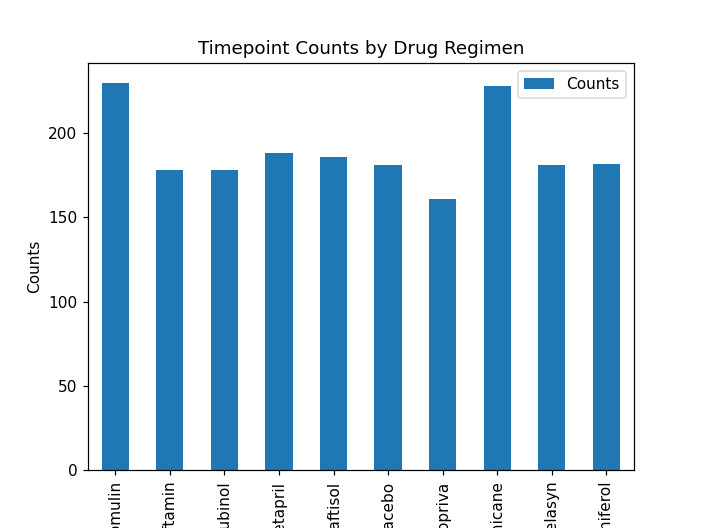

Text(0, 0.5, 'Counts')

In [28]:
Bar_Chart=Bar_Plot.plot(kind="bar", title="Timepoint Counts by Drug Regimen")
Bar_Chart.set_xlabel("Regimen Dug")
Bar_Chart.set_ylabel("Counts")



<IPython.core.display.Javascript object>


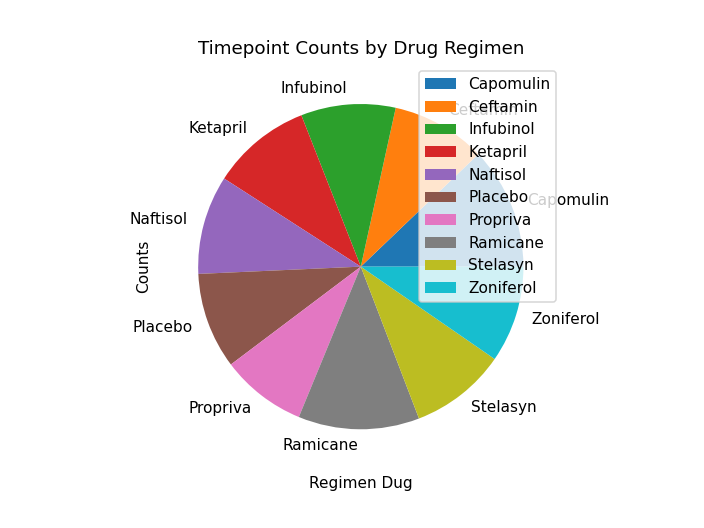

Text(0.5, 0, 'Regimen Dug')

In [29]:
Bar_Chart=Bar_Plot.plot(kind="pie", y="Counts", title="Timepoint Counts by Drug Regimen")
Bar_Chart.set_xlabel("Regimen Dug")

In [30]:
Gender_df=Combine_data[["Sex","Drug Regimen"]]
Gender_df=Gender_df.groupby("Sex").count()
Gender_df

,Drug Regimen
Sex,
Female,935
Male,958


<IPython.core.display.Javascript object>


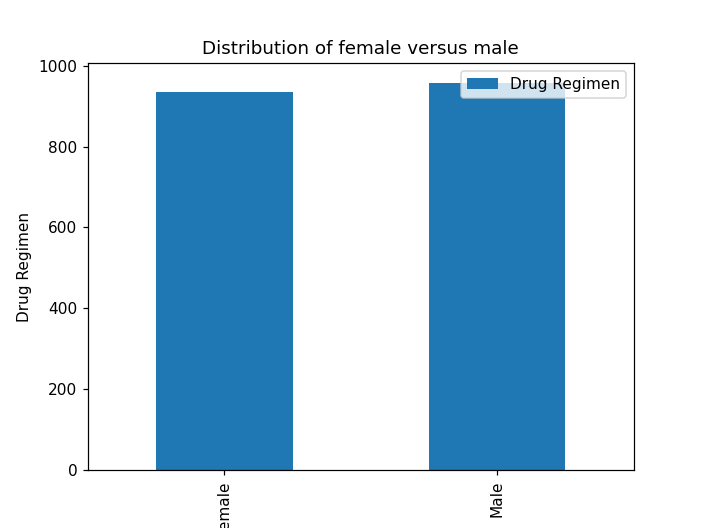

Text(0, 0.5, 'Drug Regimen')

In [31]:
Gender_Bar_Chart=Gender_df.plot(kind="bar", title="Distribution of female versus male")
Gender_Bar_Chart.set_xlabel("Sex")
Gender_Bar_Chart.set_ylabel("Drug Regimen")


<IPython.core.display.Javascript object>


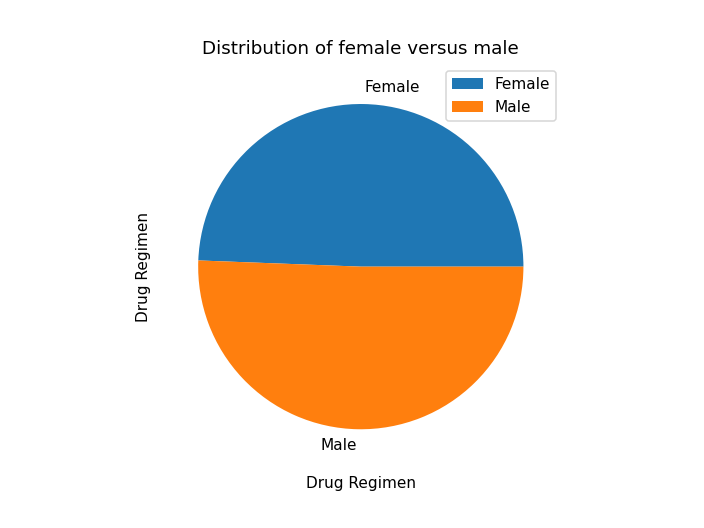

Text(0.5, 0, 'Drug Regimen')

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender_Pie_Chart=Gender_df.plot(kind="pie", y="Drug Regimen", title="Distribution of female versus male")
Gender_Pie_Chart.set_xlabel("Drug Regimen")

In [33]:
#Quartiles, Outliers and Boxplots
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Final_data=Combine_data[["Mouse ID","Drug Regimen", "Tumor Volume (mm3)"]]
Final_data
#drop duplicates
Other=Final_data.drop_duplicates(subset="Mouse ID", keep="last")
Other

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
49,g791,Ramicane,29.128472
...,...,...,...
1859,z314,Stelasyn,45.934712
1862,z435,Propriva,48.710661
1872,z581,Infubinol,62.754451
1882,z795,Naftisol,65.741070


In [34]:
 #df.loc[["Richardson", "Berry", "Hudson",                               # "Mcdonald", "Morales"], ["id", "first_name", "Phone Number"]]
#print(richardson_to_morales)
Other_df=Other.set_index("Drug Regimen")
Other_df

,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Ramicane,k403,22.050126
Capomulin,s185,23.343598
Capomulin,x401,28.484033
Capomulin,m601,28.430964
Ramicane,g791,29.128472
...,...,...
Stelasyn,z314,45.934712
Propriva,z435,48.710661
Infubinol,z581,62.754451


In [35]:
Final_data_df=Other_df.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],["Mouse ID","Tumor Volume (mm3)"]]
Final_data_df

,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,s185,23.343598
Capomulin,x401,28.484033
Capomulin,m601,28.430964
Capomulin,f966,30.485985
Capomulin,u364,31.023923
...,...,...
Ceftamin,x226,45.000000
Ceftamin,x581,64.634949
Ceftamin,x822,61.386660


In [36]:
Final_data_df.mean()
Final_data_df

/var/folders/nm/957xwkg97cx2sq2k8_4gfvw40000gn/T/ipykernel_21066/132807908.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Final_data_df.mean()


,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,s185,23.343598
Capomulin,x401,28.484033
Capomulin,m601,28.430964
Capomulin,f966,30.485985
Capomulin,u364,31.023923
...,...,...
Ceftamin,x226,45.000000
Ceftamin,x581,64.634949
Ceftamin,x822,61.386660


In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Drug_Regimen = input("Choose the Drug Regimen you would like to look at?  ")

Choose the Drug Regimen you would like to look at?  Ceftamin


In [38]:
# Create a series that looks for Drug Regimens by name and then traces each mouse and Tumor Volumen(mm3)
Drug_df= Final_data_df.loc[Drug_Regimen, ["Mouse ID", "Tumor Volume (mm3)"]]
Drug_df.head()




,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Ceftamin,a275,62.999356
Ceftamin,b447,45.000000
Ceftamin,b487,56.057749
Ceftamin,b759,55.742829
Ceftamin,f436,48.722078


<IPython.core.display.Javascript object>


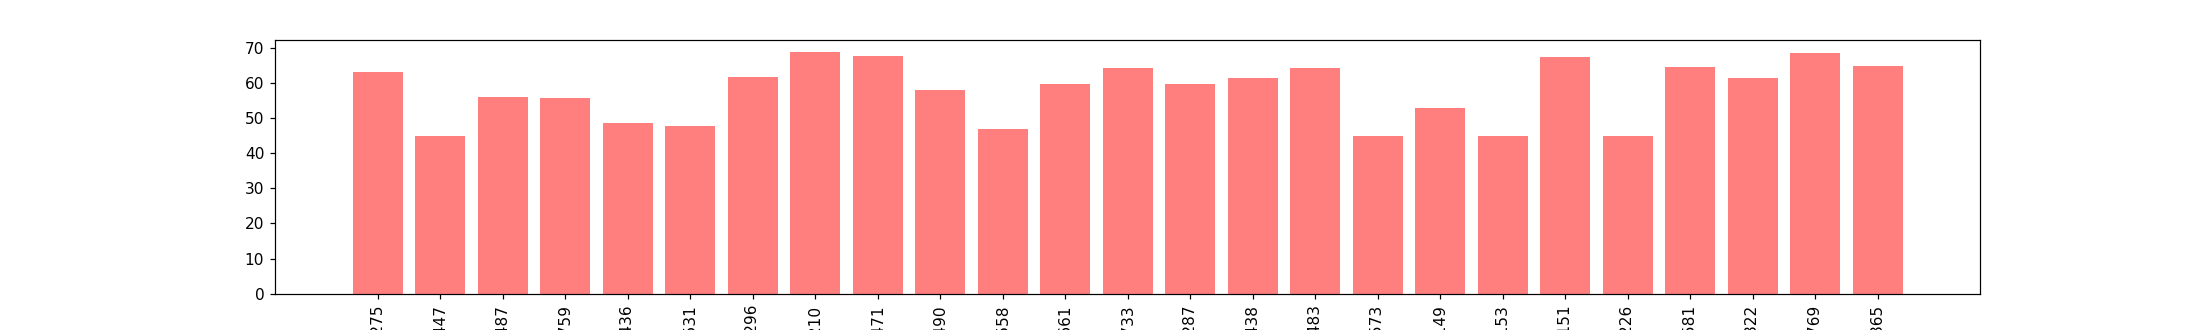

([<matplotlib.axis.XTick at 0x7fad20b57d00>,
 [Text(0, 0, 'a275'),
  Text(1, 0, 'b447'),
  Text(2, 0, 'b487'),
  Text(3, 0, 'b759'),
  Text(4, 0, 'f436'),
  Text(5, 0, 'h531'),
  Text(6, 0, 'j296'),
  Text(7, 0, 'k210'),
  Text(8, 0, 'l471'),
  Text(9, 0, 'l490'),
  Text(10, 0, 'l558'),
  Text(11, 0, 'l661'),
  Text(12, 0, 'l733'),
  Text(13, 0, 'o287'),
  Text(14, 0, 'p438'),
  Text(15, 0, 'q483'),
  Text(16, 0, 't573'),
  Text(17, 0, 'u149'),
  Text(18, 0, 'u153'),
  Text(19, 0, 'w151'),
  Text(20, 0, 'x226'),
  Text(21, 0, 'x581'),
  Text(22, 0, 'x822'),
  Text(23, 0, 'y769'),
  Text(24, 0, 'y865')])

In [39]:

x_axis = np.arange(len(Drug_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, Drug_df["Tumor Volume (mm3)"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, Drug_df["Mouse ID"], rotation="vertical")



In [40]:
Set_Drug_Index=Drug_df.set_index("Mouse ID")
Set_Drug_Index.head()




,Tumor Volume (mm3)
Mouse ID,
a275,62.999356
b447,45.000000
b487,56.057749
b759,55.742829
f436,48.722078


<IPython.core.display.Javascript object>


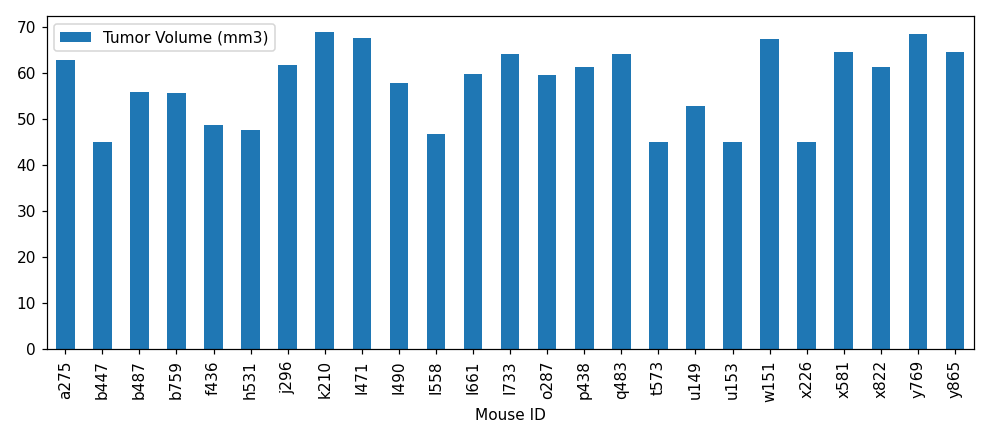

In [41]:
Set_Drug_Index.plot(kind="bar", figsize=(9,4))

plt.show()
plt.tight_layout()

In [42]:
QRT=Drug_df
QRT.head()

,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Ceftamin,a275,62.999356
Ceftamin,b447,45.000000
Ceftamin,b487,56.057749
Ceftamin,b759,55.742829
Ceftamin,f436,48.722078


<IPython.core.display.Javascript object>


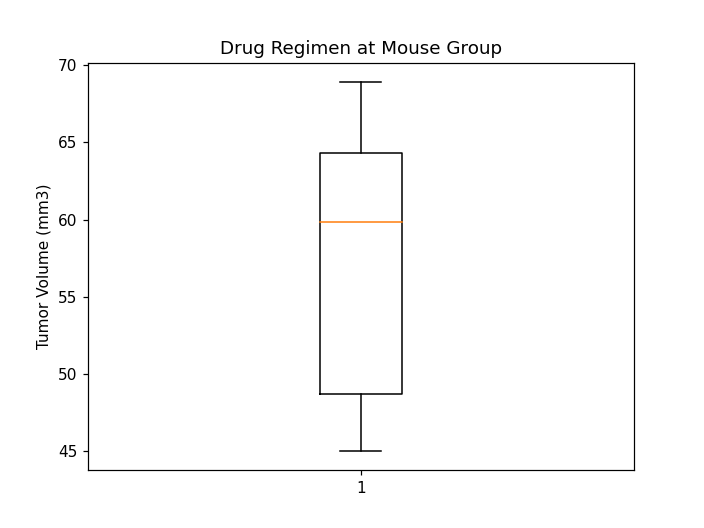

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen at Mouse Group')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(QRT["Tumor Volume (mm3)"])
plt.show()

In [44]:
# Determine if there are any potential outliers in the average
quartiles=QRT["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range (IQR) is: {iqr}")
print(f"The median is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range (IQR) is: 15.577752179999997
The median is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
